# Detecting Duplicate Contributions in Pull-Based Model Combining Textual and Change Similarities
Student   :   John Giannini <br>
Student   :   Vazgen Tadevosyan </p>




1. [Getting files ready to read](#2)
2. [Imports](#1)

3. [Dropping redundant columns and saving new data](#3)
4. [EDA](#4)
 - [Pie Chart](#4)
 - [Barplot](#5)


<h3>Getting access to google drive</h3> <a name="2"></a>

In [1]:
# run this code to have access to file in your google MyDrive cloud
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

#please specify your current working directory by assigning to "path" variable

path = "/content/drive/MyDrive/SEDS"

#changing working directory because by default it is parent directory
os.chdir(path)

<h3>Imports</h3> <a name="1"></a>

In [ ]:
import re

# in utils.py file we have all necessary regex methods which later be applied on our code and text columns
from utils import * 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app

In [ ]:
data = pd.read_csv('PullRequeset_cleaned.csv')
data.head()

,Project,Pull_id,Title,Content,Files,Diff_info,Diff_content,Duplicates
0,joomla/joomla-cms,6660.0,Undefined $model variable for postDeleteHook()...,$model is undefined at line 140 for $this->pos...,libraries/legacy/controller/admin.php,https://github.com/joomla/joomla-cms/pull/6660...,diff --git a/libraries/legacy/controller/admin...,7097.0
1,joomla/joomla-cms,3088.0,[#33256] downloaded vcard is empty,http://joomlacode.org/gf/project/joomla/tracke...,components/com_contact/views/contact/view.vcf.php,https://github.com/joomla/joomla-cms/pull/3088...,diff --git a/components/com_contact/views/cont...,3114.0
2,joomla/joomla-cms,3093.0,Bind Variable Fix Within PDO Driver,This fix is to revert back to original behavio...,libraries/joomla/database/driver/pdo.php,https://github.com/joomla/joomla-cms/pull/3093...,diff --git a/libraries/joomla/database/driver/...,3432.0
3,joomla/joomla-cms,5664.0,CAPTCHA and reCAPTCHA (Legacy) #5595,We were wrong to call it nocaptcha. We were to...,administrator/language/en-GB/en-GB.com_config....,https://github.com/joomla/joomla-cms/pull/5664...,diff --git a/administrator/language/en-GB/en-G...,5888.0
4,joomla/joomla-cms,2596.0,Fix a failing unit test [#32813],This should fix a unit test that is currently ...,tests/unit/suites/libraries/joomla/registry/fo...,https://github.com/joomla/joomla-cms/pull/2596...,diff --git a/tests/unit/suites/libraries/jooml...,2612.0


<h1>Explanatory Data Analysis</h1><a name='3'></a>
<h3>Pie Chart</h3> <a name="4"></a>

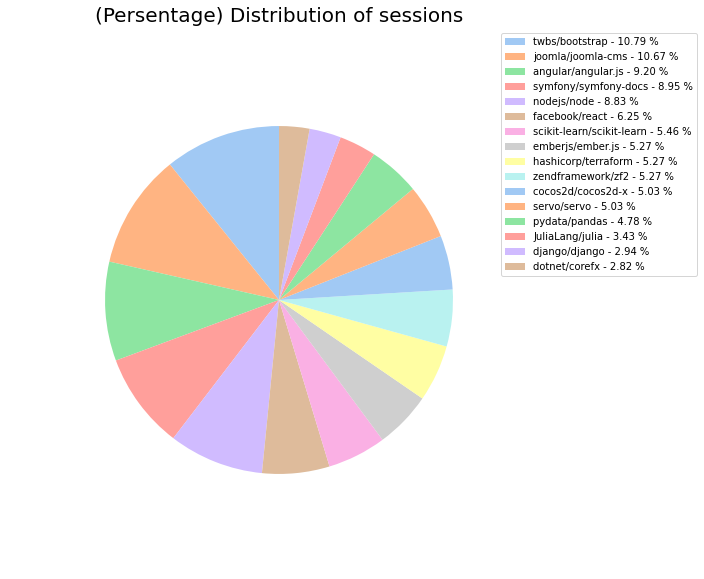

In [ ]:
plt.figure(figsize=(13,10))
colors = sns.color_palette('pastel')[0:15]
x =  data['Project'].value_counts().index
y = np.array(data['Project'].value_counts().tolist())
#create pie chart
porcent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=0.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, bbox_to_anchor=(0.9, 1.),
           fontsize=10)
# plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("(Persentage) Distribution of sessions",fontsize=20)
plt.show()

<h3>Barplot</h3> <a name="5"></a>

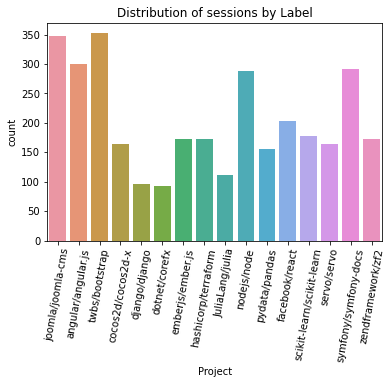

twbs/bootstrap               10.790926
joomla/joomla-cms            10.668302
angular/angular.js            9.196812
symfony/symfony-docs          8.951563
nodejs/node                   8.828939
facebook/react                6.253832
scikit-learn/scikit-learn     5.456775
emberjs/ember.js              5.272839
hashicorp/terraform           5.272839
zendframework/zf2             5.272839
cocos2d/cocos2d-x             5.027590
servo/servo                   5.027590
pydata/pandas                 4.782342
JuliaLang/julia               3.433476
django/django                 2.942980
dotnet/corefx                 2.820356
Name: Project, dtype: float64

In [ ]:
sns.countplot(x="Project",data=data)
plt.title(f"Distribution of sessions by Label")
plt.xticks(rotation = 80)
plt.show()
data['Project'].value_counts()/len(data)*100
#percentage of each Label class

In [ ]:
data["label"].value_counts()

0    1632
1    1630
Name: label, dtype: int64

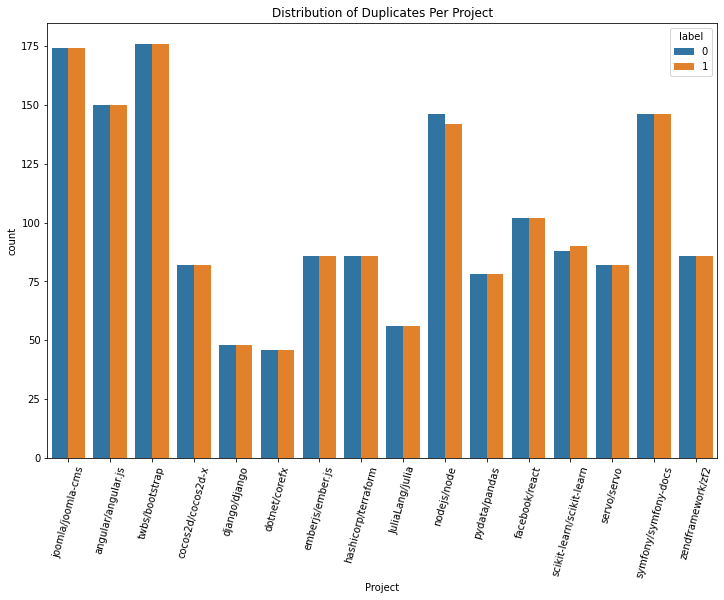

In [ ]:
plt.figure(figsize = [12, 8])
plt.xticks(rotation=75)
plt.title("Distribution of Duplicates Per Project")

sns.countplot(x="Project", hue="label", data=data)
plt.show()